In [18]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('analysis_results.csv')

# Display the first few rows of the DataFrame
df.head()

,Folder,Islet,Glucose,Capillaries,Avg_Total_Oxygen,Avg_Medium_Oxygen,Num_Cells,Num_Alpha,Num_Beta,Num_Delta,...,Non_Viable_Prop,Functional_Alpha_Prop,Hypoxic_Alpha_Prop,Non_Viable_Alpha_Prop,Functional_Beta_Prop,Hypoxic_Beta_Prop,Non_Viable_Beta_Prop,Functional_Delta_Prop,Hypoxic_Delta_Prop,Non_Viable_Delta_Prop
0,H55_200_capilares_G20_Rep_1,H55,G20,200,27.7415,27.9858,2084,1168,642,274,...,0.000000,0.833904,0.166096,0.000000,0.956386,0.043614,0.000000,0.967153,0.032847,0.000000
1,H56_5_capilares_G20_Rep_1,H56,G20,5,7.1825,7.4731,2841,1355,830,656,...,0.871876,0.010332,0.106273,0.883395,0.026506,0.097590,0.875904,0.025915,0.131098,0.842988
2,H51_50_capilares_G6_Rep_1,H51,G6,50,26.1501,26.3939,583,316,148,119,...,0.029160,0.598101,0.354430,0.047468,0.702703,0.290541,0.006757,0.697479,0.294118,0.008403
3,H54_300_capilares_G6_Rep_1,H54,G6,300,28.8210,28.9475,3516,2209,961,346,...,0.000000,0.990493,0.009507,0.000000,0.990635,0.009365,0.000000,0.994220,0.005780,0.000000
4,H55_5_capilares_G20_Rep_1,H55,G20,5,8.8711,9.2349,2084,1168,642,274,...,0.782150,0.010274,0.186644,0.803082,0.018692,0.250779,0.730530,0.021898,0.164234,0.813869


## Comparison of Avg Medium Oxygen by Capillaries and Glucose Condition

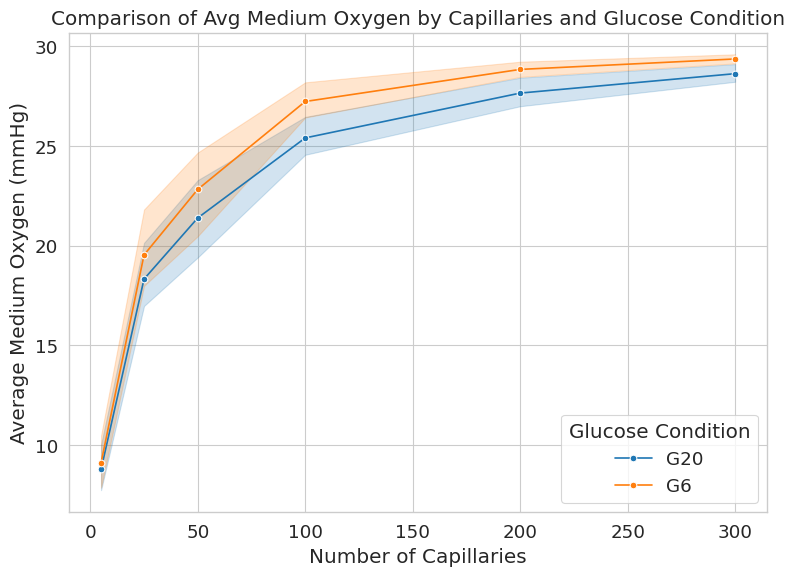

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style for scientific journal formatting
sns.set_context("paper", font_scale=1.5)
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="Capillaries", y="Avg_Medium_Oxygen", hue="Glucose", marker="o")

# Add labels and title
plt.xlabel("Number of Capillaries")
plt.ylabel("Average Medium Oxygen (mmHg)")
plt.title("Comparison of Avg Medium Oxygen by Capillaries and Glucose Condition")
plt.legend(title="Glucose Condition")

# Save the plot as a high-resolution image
plt.tight_layout()
plt.savefig("avg_medium_oxygen_vs_capillaries.png", dpi=300)

# Show the plot
plt.show()

## Proportions of Functional, Hypoxic, and Non-Viable Cells by Capillaries

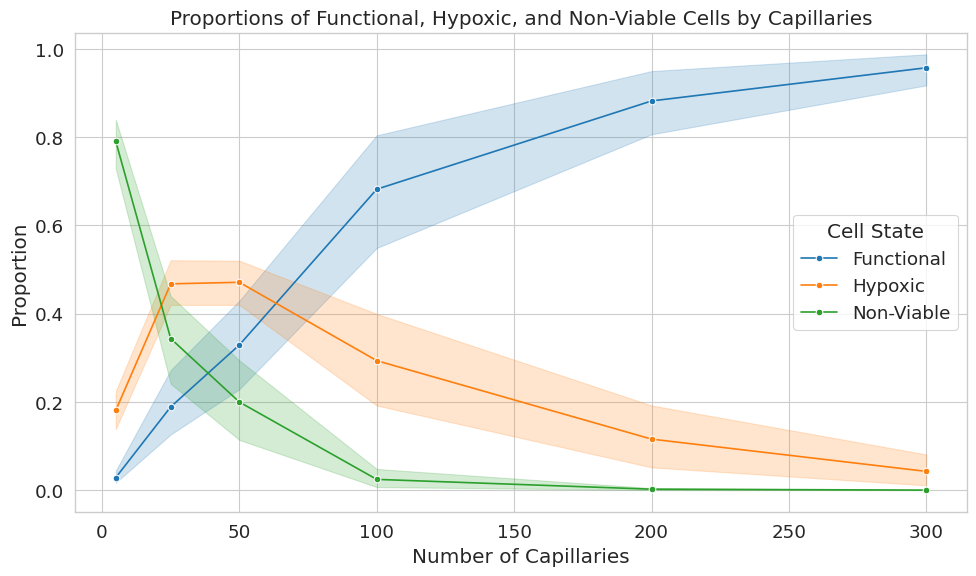

In [20]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the proportions
sns.lineplot(data=df, x="Capillaries", y="Functional_Prop", label="Functional", marker="o")
sns.lineplot(data=df, x="Capillaries", y="Hypoxic_Prop", label="Hypoxic", marker="o")
sns.lineplot(data=df, x="Capillaries", y="Non_Viable_Prop", label="Non-Viable", marker="o")

# Add labels and title
plt.xlabel("Number of Capillaries")
plt.ylabel("Proportion")
plt.title("Proportions of Functional, Hypoxic, and Non-Viable Cells by Capillaries")
plt.legend(title="Cell State")

# Save and show the plot
plt.tight_layout()
plt.savefig("cell_proportions_vs_capillaries.png", dpi=300)
plt.show()

## Proportions of functional, hypoxic and non-viable cells by cell population and glucose level

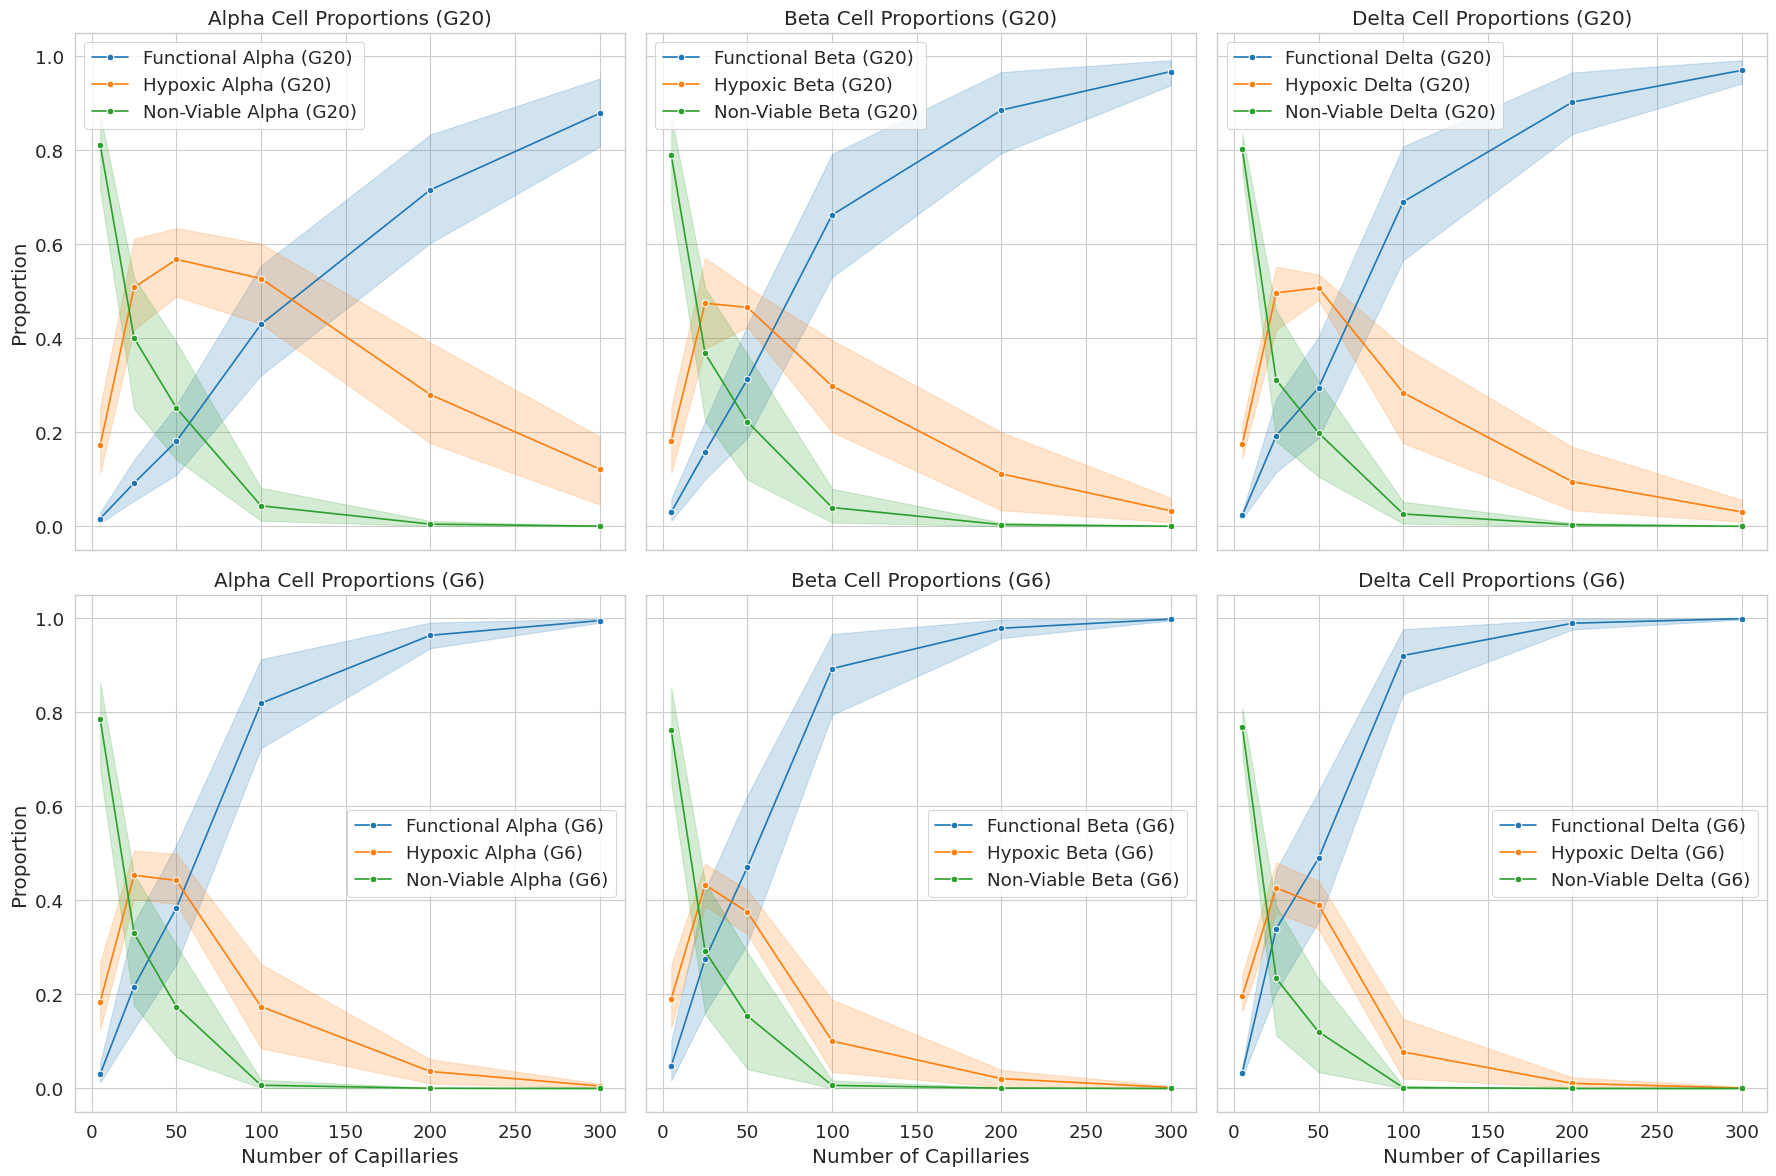

In [21]:
# Filter the data for G20 and G6 glucose conditions
g20_data = df[df['Glucose'] == 'G20']
g6_data = df[df['Glucose'] == 'G6']

fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True)

# Plot proportions for alpha cells
sns.lineplot(data=g20_data, x="Capillaries", y="Functional_Alpha_Prop", label="Functional Alpha (G20)", marker="o", ax=axes[0, 0])
sns.lineplot(data=g20_data, x="Capillaries", y="Hypoxic_Alpha_Prop", label="Hypoxic Alpha (G20)", marker="o", ax=axes[0, 0])
sns.lineplot(data=g20_data, x="Capillaries", y="Non_Viable_Alpha_Prop", label="Non-Viable Alpha (G20)", marker="o", ax=axes[0, 0])
sns.lineplot(data=g6_data, x="Capillaries", y="Functional_Alpha_Prop", label="Functional Alpha (G6)", marker="o", ax=axes[1, 0])
sns.lineplot(data=g6_data, x="Capillaries", y="Hypoxic_Alpha_Prop", label="Hypoxic Alpha (G6)", marker="o", ax=axes[1, 0])
sns.lineplot(data=g6_data, x="Capillaries", y="Non_Viable_Alpha_Prop", label="Non-Viable Alpha (G6)", marker="o", ax=axes[1, 0])
axes[0, 0].set_title("Alpha Cell Proportions (G20)")
axes[1, 0].set_title("Alpha Cell Proportions (G6)")

# Plot proportions for beta cells
sns.lineplot(data=g20_data, x="Capillaries", y="Functional_Beta_Prop", label="Functional Beta (G20)", marker="o", ax=axes[0, 1])
sns.lineplot(data=g20_data, x="Capillaries", y="Hypoxic_Beta_Prop", label="Hypoxic Beta (G20)", marker="o", ax=axes[0, 1])
sns.lineplot(data=g20_data, x="Capillaries", y="Non_Viable_Beta_Prop", label="Non-Viable Beta (G20)", marker="o", ax=axes[0, 1])
sns.lineplot(data=g6_data, x="Capillaries", y="Functional_Beta_Prop", label="Functional Beta (G6)", marker="o", ax=axes[1, 1])
sns.lineplot(data=g6_data, x="Capillaries", y="Hypoxic_Beta_Prop", label="Hypoxic Beta (G6)", marker="o", ax=axes[1, 1])
sns.lineplot(data=g6_data, x="Capillaries", y="Non_Viable_Beta_Prop", label="Non-Viable Beta (G6)", marker="o", ax=axes[1, 1])
axes[0, 1].set_title("Beta Cell Proportions (G20)")
axes[1, 1].set_title("Beta Cell Proportions (G6)")

# Plot proportions for delta cells
sns.lineplot(data=g20_data, x="Capillaries", y="Functional_Delta_Prop", label="Functional Delta (G20)", marker="o", ax=axes[0, 2])
sns.lineplot(data=g20_data, x="Capillaries", y="Hypoxic_Delta_Prop", label="Hypoxic Delta (G20)", marker="o", ax=axes[0, 2])
sns.lineplot(data=g20_data, x="Capillaries", y="Non_Viable_Delta_Prop", label="Non-Viable Delta (G20)", marker="o", ax=axes[0, 2])
sns.lineplot(data=g6_data, x="Capillaries", y="Functional_Delta_Prop", label="Functional Delta (G6)", marker="o", ax=axes[1, 2])
sns.lineplot(data=g6_data, x="Capillaries", y="Hypoxic_Delta_Prop", label="Hypoxic Delta (G6)", marker="o", ax=axes[1, 2])
sns.lineplot(data=g6_data, x="Capillaries", y="Non_Viable_Delta_Prop", label="Non-Viable Delta (G6)", marker="o", ax=axes[1, 2])
axes[0, 2].set_title("Delta Cell Proportions (G20)")
axes[1, 2].set_title("Delta Cell Proportions (G6)")

# Set common labels
for ax in axes.flat:
    ax.set_xlabel("Number of Capillaries")
    ax.set_ylabel("Proportion")
    ax.legend()

plt.tight_layout()
plt.savefig("cell_proportions_comparison.png", dpi=300)
plt.show()


In [22]:
""" <!-- Here are some ideas to include islet size and cell population sizes in your analysis:

1. **Correlation Analysis**:
    - Analyze the correlation between islet size (e.g., `Num_Cells`) and oxygen levels (`Avg_Total_Oxygen`, `Avg_Medium_Oxygen`, etc.).
    - Similarly, analyze the correlation between cell population sizes (`Num_Alpha`, `Num_Beta`, `Num_Delta`) and oxygen levels or proportions of functional, hypoxic, and non-viable cells.

2. **Proportional Analysis**:
    - Calculate the proportion of each cell type (`Num_Alpha`, `Num_Beta`, `Num_Delta`) relative to the total number of cells (`Num_Cells`) and analyze how these proportions vary with capillary density or glucose levels.

3. **Group Comparisons**:
    - Group the data by islet size (e.g., small, medium, large based on `Num_Cells`) and compare the functional, hypoxic, and non-viable proportions across these groups.

4. **Visualization**:
    - Create scatter plots of islet size (`Num_Cells`) vs. oxygen levels or functional proportions, with different markers or colors for glucose levels.
    - Use stacked bar plots to show the distribution of cell populations (`Num_Alpha`, `Num_Beta`, `Num_Delta`) for different islet sizes or capillary densities.

5. **Regression Models**:
    - Build regression models to predict oxygen levels or functional proportions based on islet size and cell population sizes.

6. **Islet Size Categories**:
    - Categorize islets into size bins (e.g., small, medium, large) and analyze trends in oxygen levels or cell proportions within these categories.

7. **Cell Population Ratios**:
    - Calculate ratios like `Num_Alpha / Num_Beta` or `Num_Alpha / Num_Delta` and analyze how these ratios influence oxygen levels or functional proportions.

8. **Heatmaps**:
    - Create heatmaps to visualize the relationship between islet size, cell population sizes, and oxygen levels or functional proportions.

Let me know if you\'d like code for any specific idea! --> """

" <!-- Here are some ideas to include islet size and cell population sizes in your analysis:\n\n1. **Correlation Analysis**:\n    - Analyze the correlation between islet size (e.g., `Num_Cells`) and oxygen levels (`Avg_Total_Oxygen`, `Avg_Medium_Oxygen`, etc.).\n    - Similarly, analyze the correlation between cell population sizes (`Num_Alpha`, `Num_Beta`, `Num_Delta`) and oxygen levels or proportions of functional, hypoxic, and non-viable cells.\n\n2. **Proportional Analysis**:\n    - Calculate the proportion of each cell type (`Num_Alpha`, `Num_Beta`, `Num_Delta`) relative to the total number of cells (`Num_Cells`) and analyze how these proportions vary with capillary density or glucose levels.\n\n3. **Group Comparisons**:\n    - Group the data by islet size (e.g., small, medium, large based on `Num_Cells`) and compare the functional, hypoxic, and non-viable proportions across these groups.\n\n4. **Visualization**:\n    - Create scatter plots of islet size (`Num_Cells`) vs. oxygen l

## Correlation between islet size (e.g., `Num_Cells`) and medium and cell oxygen levels

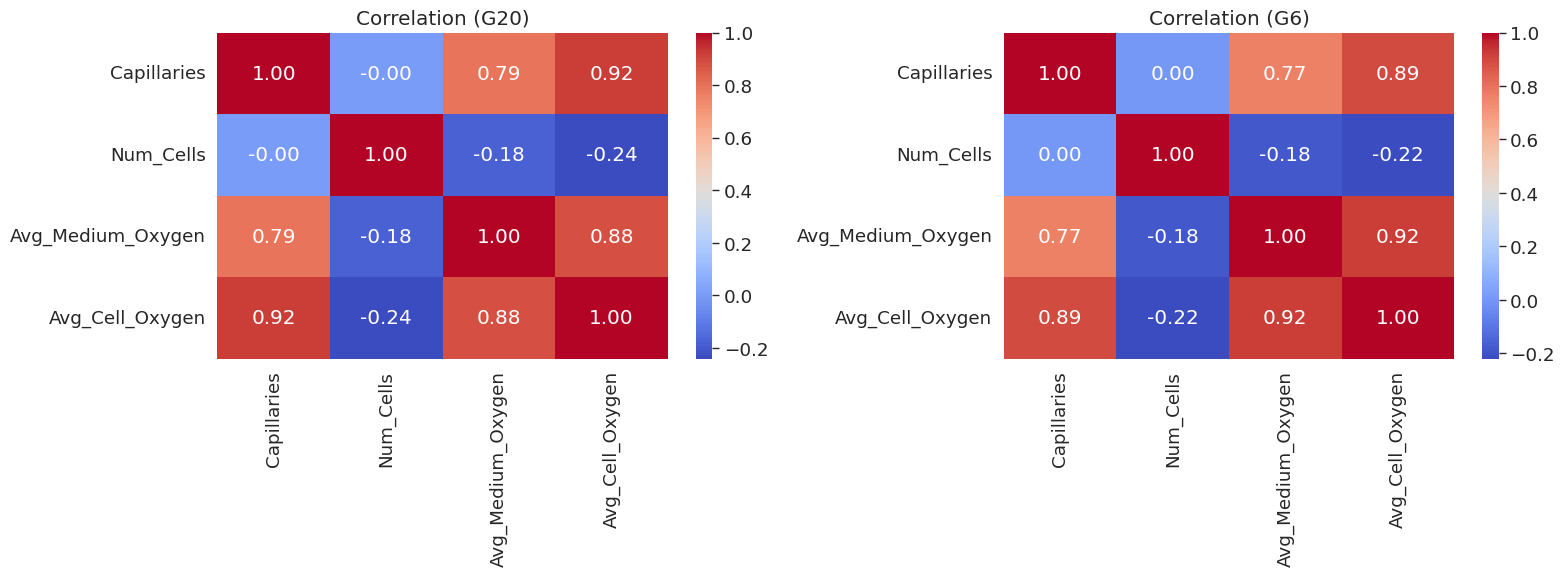

In [23]:
# Include 'Capillaries' in the correlation analysis
g20_corr = g20_data[['Capillaries', 'Num_Cells', 'Avg_Medium_Oxygen', 'Avg_Cell_Oxygen']].corr()
g6_corr = g6_data[['Capillaries', 'Num_Cells', 'Avg_Medium_Oxygen', 'Avg_Cell_Oxygen']].corr()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot correlation matrix for G20
sns.heatmap(g20_corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation (G20)")

# Plot correlation matrix for G6
sns.heatmap(g6_corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation (G6)")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


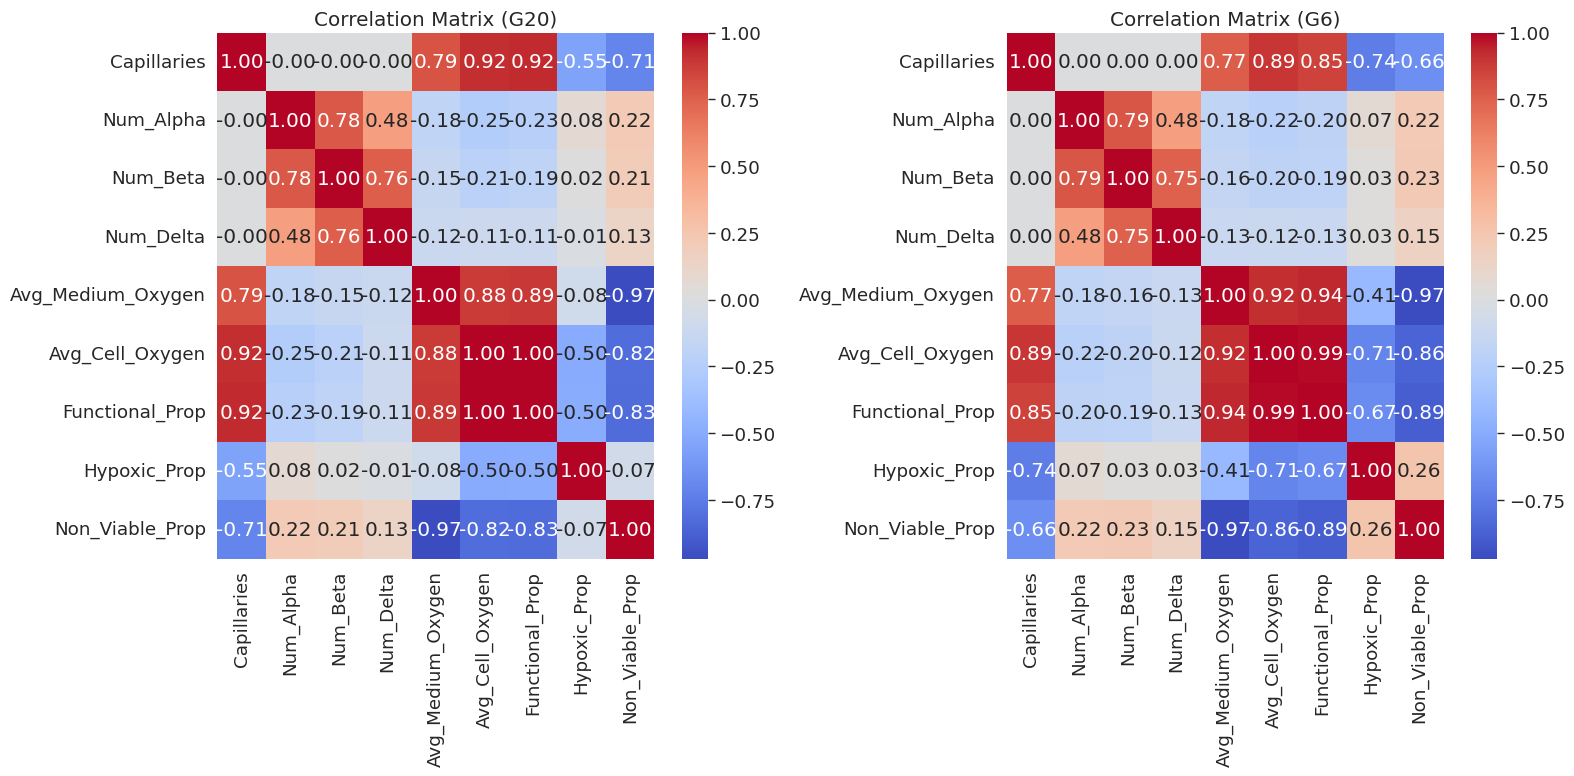

In [24]:
# Ensure that the cell defining 'df' is executed before running this cell.

# Select relevant columns for correlation analysis, including 'Capillaries'
columns_of_interest = ['Capillaries', 'Num_Alpha', 'Num_Beta', 'Num_Delta', 
                       'Avg_Medium_Oxygen', 'Avg_Cell_Oxygen', 
                       'Functional_Prop', 'Hypoxic_Prop', 'Non_Viable_Prop']

# Calculate the correlation matrices for G20 and G6
g20_corr = g20_data[columns_of_interest].corr()
g6_corr = g6_data[columns_of_interest].corr()

# Create subplots for the two glucose levels
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the correlation matrix for G20
sns.heatmap(g20_corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Matrix (G20)")

# Plot the correlation matrix for G6
sns.heatmap(g6_corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Matrix (G6)")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

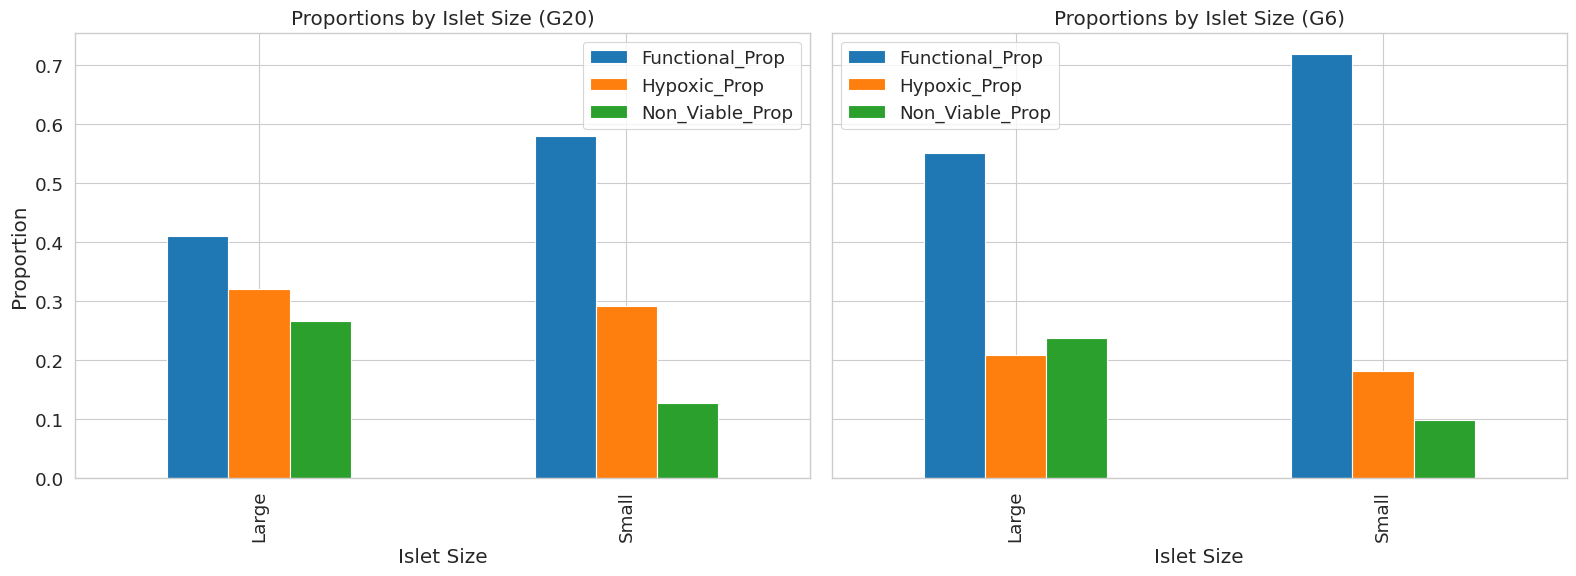

In [25]:
# Define islet size categories
def categorize_islet_size(num_cells):
    if num_cells < 1000:
        return 'Small'
    elif num_cells < 2000 and num_cells >= 1000:
        return 'Medium'
    else:
        return 'Large'
    
    # Ensure g20_data and g6_data are deep copies
g20_data = g20_data.copy()
g6_data = g6_data.copy()

# Apply the categorization to both G20 and G6 data
g20_data['Islet_Size'] = g20_data['Num_Cells'].apply(categorize_islet_size)
g6_data['Islet_Size'] = g6_data['Num_Cells'].apply(categorize_islet_size)

# Group by islet size and calculate mean proportions
g20_grouped = g20_data.groupby('Islet_Size')[['Functional_Prop', 'Hypoxic_Prop', 'Non_Viable_Prop']].mean()
g6_grouped = g6_data.groupby('Islet_Size')[['Functional_Prop', 'Hypoxic_Prop', 'Non_Viable_Prop']].mean()

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

g20_grouped.plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('Proportions by Islet Size (G20)')
axes[0].set_ylabel('Proportion')
axes[0].set_xlabel('Islet Size')

g6_grouped.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_title('Proportions by Islet Size (G6)')
axes[1].set_xlabel('Islet Size')

plt.tight_layout()
plt.show()

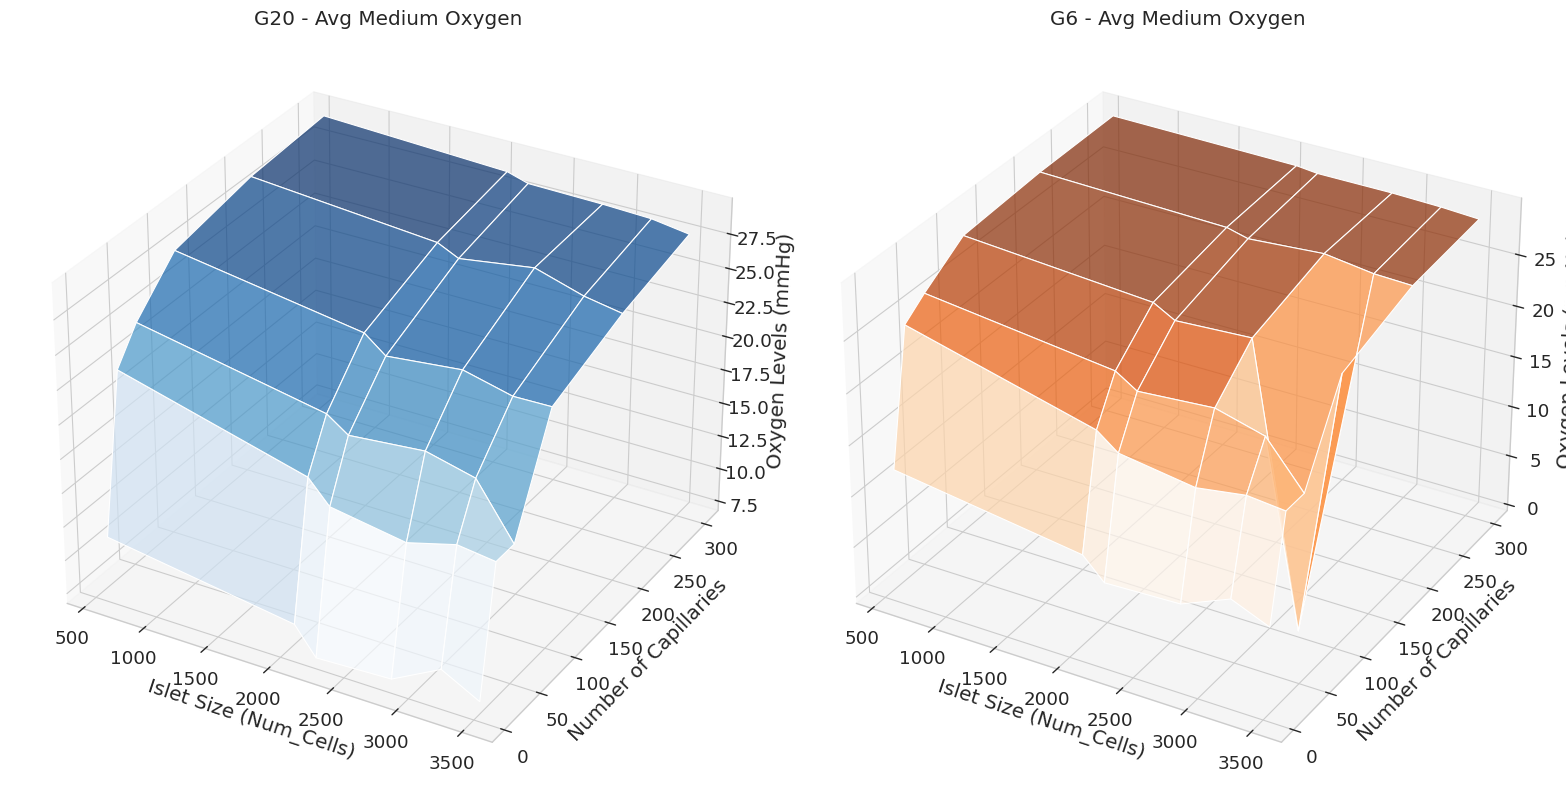

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

# Prepare data for surface plot
def prepare_surface_data(data, x_col, y_col, z_col):
    x = data[x_col]
    y = data[y_col]
    z = data[z_col]
    x_unique = np.unique(x)
    y_unique = np.unique(y)
    x_grid, y_grid = np.meshgrid(x_unique, y_unique)
    z_grid = np.zeros_like(x_grid, dtype=float)
    for i in range(len(x_unique)):
        for j in range(len(y_unique)):
            mask = (x == x_unique[i]) & (y == y_unique[j])
            if mask.any():
                z_grid[j, i] = z[mask].mean()
    return x_grid, y_grid, z_grid

# Create subplots for 3D surface plots
fig = plt.figure(figsize=(16, 8))

# Subplot for G20
ax1 = fig.add_subplot(121, projection='3d')
x_grid, y_grid, z_grid = prepare_surface_data(g20_data, 'Num_Cells', 'Capillaries', 'Avg_Medium_Oxygen')
ax1.plot_surface(x_grid, y_grid, z_grid, cmap=cm.Blues, alpha=0.7)
ax1.set_title('G20 - Avg Medium Oxygen')
ax1.set_xlabel('Islet Size (Num_Cells)')
ax1.set_ylabel('Number of Capillaries')
ax1.set_zlabel('Oxygen Levels (mmHg)')

# Subplot for G6
ax2 = fig.add_subplot(122, projection='3d')
x_grid, y_grid, z_grid = prepare_surface_data(g6_data, 'Num_Cells', 'Capillaries', 'Avg_Medium_Oxygen')
ax2.plot_surface(x_grid, y_grid, z_grid, cmap=cm.Oranges, alpha=0.7)
ax2.set_title('G6 - Avg Medium Oxygen')
ax2.set_xlabel('Islet Size (Num_Cells)')
ax2.set_ylabel('Number of Capillaries')
ax2.set_zlabel('Oxygen Levels (mmHg)')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

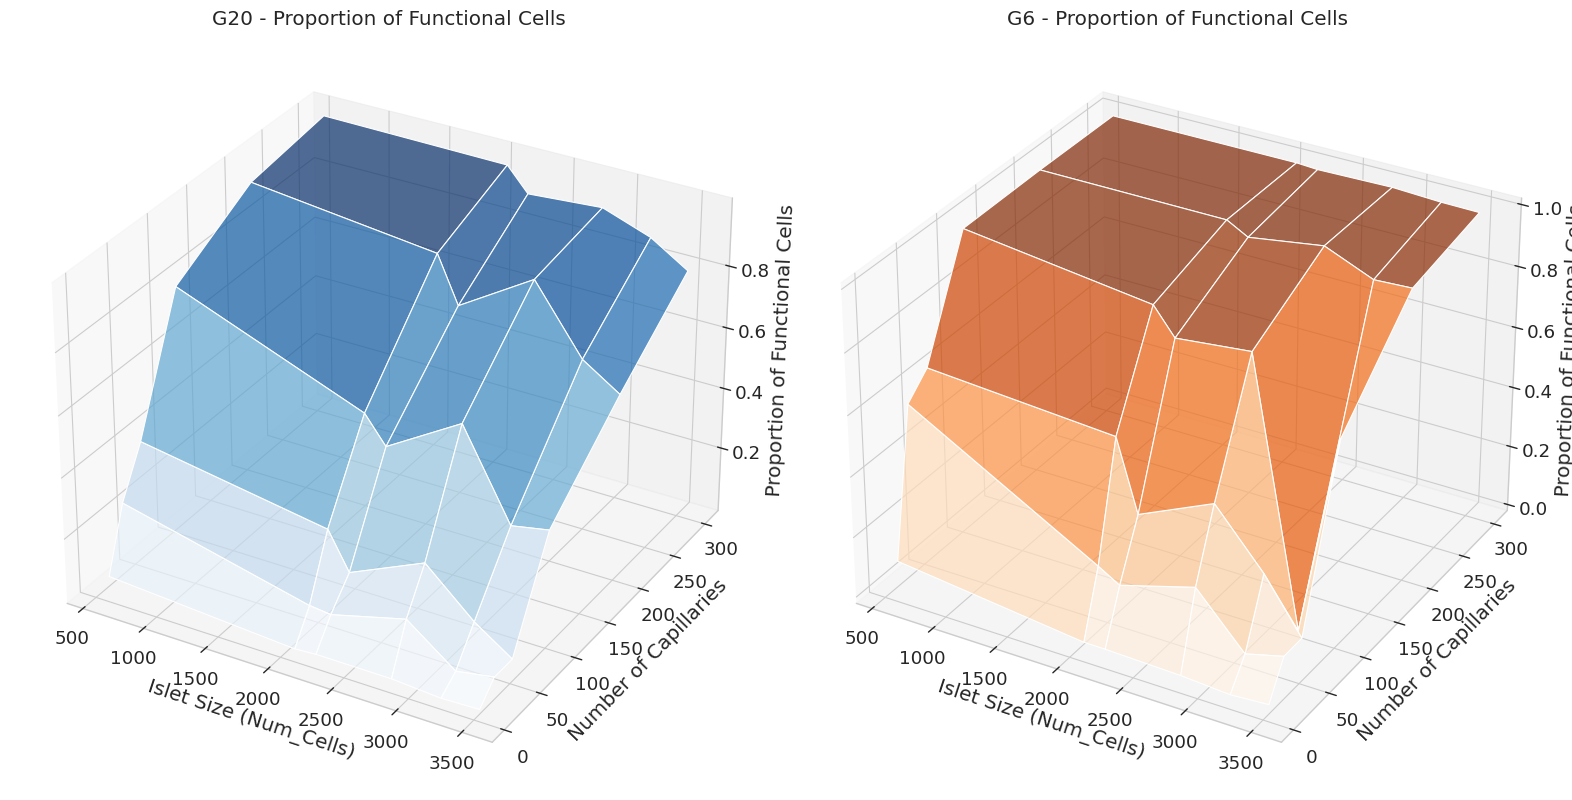

In [27]:
# Prepare data for surface plot using Functional_Prop
x_grid, y_grid, z_grid = prepare_surface_data(g6_data, 'Num_Cells', 'Capillaries', 'Functional_Prop')

# Create subplots for 3D surface plots
fig = plt.figure(figsize=(16, 8))

# Subplot for G20
ax1 = fig.add_subplot(121, projection='3d')
x_grid_g20, y_grid_g20, z_grid_g20 = prepare_surface_data(g20_data, 'Num_Cells', 'Capillaries', 'Functional_Prop')
ax1.plot_surface(x_grid_g20, y_grid_g20, z_grid_g20, cmap=cm.Blues, alpha=0.7)
ax1.set_title('G20 - Proportion of Functional Cells')
ax1.set_xlabel('Islet Size (Num_Cells)')
ax1.set_ylabel('Number of Capillaries')
ax1.set_zlabel('Proportion of Functional Cells')

# Subplot for G6
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_grid, y_grid, z_grid, cmap=cm.Oranges, alpha=0.7)
ax2.set_title('G6 - Proportion of Functional Cells')
ax2.set_xlabel('Islet Size (Num_Cells)')
ax2.set_ylabel('Number of Capillaries')
ax2.set_zlabel('Proportion of Functional Cells')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data
# Convert 'Islet_Size' to numerical values
islet_size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}
g20_data['Islet_Size_Num'] = g20_data['Islet_Size'].map(islet_size_mapping)

# Features and target variable
X = g20_data[['Capillaries', 'Islet_Size_Num']]
y = g20_data['Functional_Prop']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 0.013888179391584893
R-squared: 0.8758136229346619
Coefficients: [ 0.00317777 -0.06944041]
Intercept: 0.2146947931397732


/home/gerardo/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


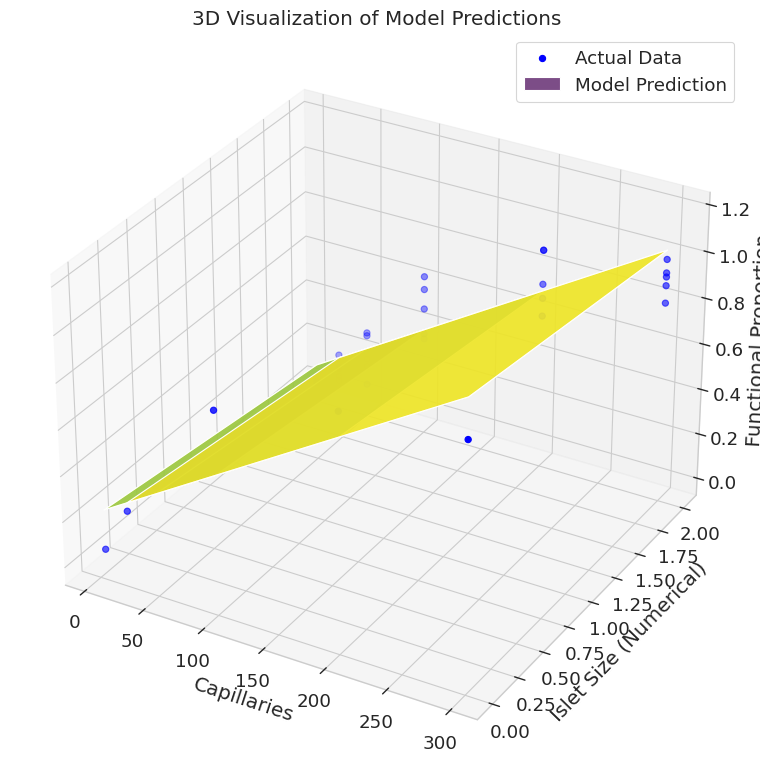

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create a 3D plot
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(g20_data['Capillaries'], g20_data['Islet_Size_Num'], g20_data['Functional_Prop'], color='blue', label='Actual Data')

# Surface plot of the predicted values
x_grid, y_grid = np.meshgrid(g20_data['Capillaries'].unique(), g20_data['Islet_Size_Num'].unique())
z_grid = model.predict(np.c_[x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)
ax.plot_surface(x_grid, y_grid, z_grid, cmap=cm.viridis, alpha=0.7, label='Model Prediction')

# Set labels and title
ax.set_xlabel('Capillaries')
ax.set_ylabel('Islet Size (Numerical)')
ax.set_zlabel('Functional Proportion')
ax.set_title('3D Visualization of Model Predictions')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the threshold for high oxygen levels
high_oxygen_threshold = 20  # Adjust this value as needed

# Filter the data for high oxygen levels
high_oxygen_data = g20_data[g20_data['Avg_Medium_Oxygen'] >= high_oxygen_threshold]

# Features and target variable
X = high_oxygen_data[['Islet_Size_Num', 'Avg_Medium_Oxygen']]
y = high_oxygen_data['Capillaries']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction
example_islet_size = 2  # Large islet
example_oxygen_level = 30  # Desired oxygen level
predicted_capillaries = rf_model.predict([[example_islet_size, example_oxygen_level]])
print(f"Predicted number of capillaries: {predicted_capillaries[0]}")

Mean Squared Error: 761.4
R-squared: 0.7885
Predicted number of capillaries: 294.0


/home/gerardo/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


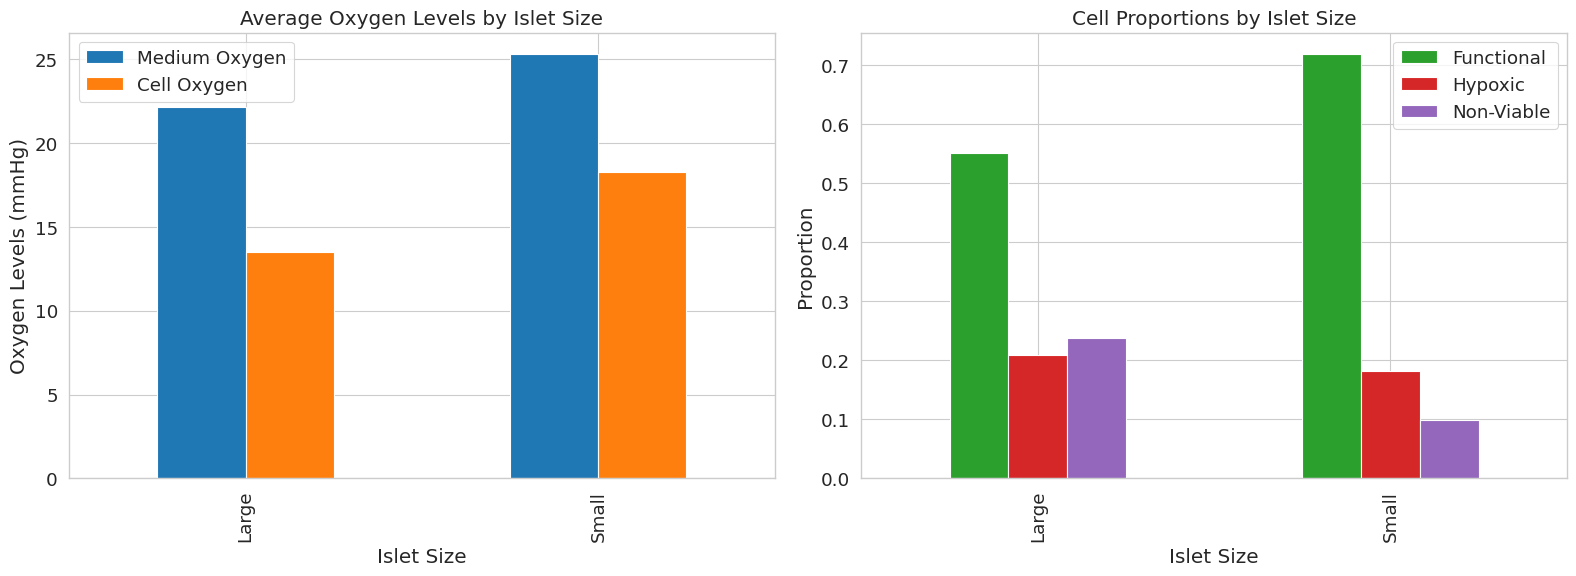

In [31]:
# Group data by islet size and calculate mean oxygen levels and cell proportions
oxygen_levels = g6_data.groupby('Islet_Size')[['Avg_Medium_Oxygen', 'Avg_Cell_Oxygen']].mean()
cell_proportions = g6_data.groupby('Islet_Size')[['Functional_Prop', 'Hypoxic_Prop', 'Non_Viable_Prop']].mean()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot average oxygen levels
oxygen_levels.plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Average Oxygen Levels by Islet Size')
axes[0].set_ylabel('Oxygen Levels (mmHg)')
axes[0].set_xlabel('Islet Size')
axes[0].legend(['Medium Oxygen', 'Cell Oxygen'])

# Plot cell proportions
cell_proportions.plot(kind='bar', ax=axes[1], color=['#2ca02c', '#d62728', '#9467bd'])
axes[1].set_title('Cell Proportions by Islet Size')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Islet Size')
axes[1].legend(['Functional', 'Hypoxic', 'Non-Viable'])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()